In [1]:
import numpy as np
import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM, RNN
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [2]:
from tensorflow.compat.v1.keras.backend import get_session
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term



# Data Prep

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

def data_preprocesing(data,target,data_len):

  scaler = MinMaxScaler()

  data.iloc[:,0:] = scaler.fit_transform(data.iloc[:,0:].to_numpy())

  X = data
  y = target

  data_x = np.array(X, dtype=float)
  data_x = data_x.reshape((data_len,17,1))

  target = np.array(y, dtype=float)
  # target = target.reshape(169113,1,1)

  return data_x, target

In [58]:
with open('/content/drive/MyDrive/Thesis/DATASETS/PeMS_data/train_x.pkl','rb') as f:
  data = pickle.load(f)

In [29]:
import pickle

with open('/content/drive/MyDrive/Thesis/DATASETS/PeMS_data/train_x.pkl','rb') as f:
  train_x = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/PeMS_data/train_y.pkl','rb') as f:
  train_y = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/PeMS_data/test_x.pkl','rb') as f:
  test_x = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/PeMS_data/test_y.pkl','rb') as f:
  test_y = pickle.load(f)

In [26]:
train_x.shape,test_x.shape

((169113, 17), (42279, 17))

In [30]:
train_x, train_y = data_preprocesing(train_x, train_y,169113)
test_x, test_y = data_preprocesing(test_x, test_y,42279)

# Model Training

In [31]:
callback = callbacks.EarlyStopping(monitor='loss', patience = 3)

model = Sequential()  
model.add(GRU(64, input_shape=(17, 1),return_sequences=True))
model.add(GRU(64))
model.add(Dense(64))
# model.add(Dense(64))
model.add(Dense(1, activation= "linear"))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy','mse'])

In [ ]:
# model = Sequential()  
# model.add(GRU((64), batch_input_shape=(None,17,1),return_sequences=False))
# # model.add(Dropout(0.2))
# model.add(Dense(64))
# # model.add(Dropout(0.2))
# model.add(Dense(1, activation= "linear"))
# model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy','mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 17, 64)            12864     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 42,049
Trainable params: 42,049
Non-trainable params: 0
_________________________________________________________________


In [34]:
import time
tmp = time.time()

history = model.fit(train_x,train_y,epochs=50, callbacks=[callback], validation_data=(test_x,test_y))

gpu_time = time.time() - tmp
print("GPU Training Time: %s seconds" % (str(gpu_time)))

Train on 169113 samples, validate on 42279 samples
Epoch 1/50
169113/169113 [==============================] - ETA: 0s - loss: 3.1034 - acc: 0.0000e+00 - mean_squared_error: 70.3092

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


169113/169113 [==============================] - 114s 676us/sample - loss: 3.1034 - acc: 0.0000e+00 - mean_squared_error: 70.3092 - val_loss: 1.1692 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.3662
Epoch 2/50
169113/169113 [==============================] - 112s 660us/sample - loss: 1.1281 - acc: 0.0000e+00 - mean_squared_error: 4.0151 - val_loss: 1.2852 - val_acc: 0.0000e+00 - val_mean_squared_error: 4.0622
Epoch 3/50
169113/169113 [==============================] - 111s 657us/sample - loss: 1.0099 - acc: 0.0000e+00 - mean_squared_error: 2.8764 - val_loss: 0.8706 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.8515
Epoch 4/50
169113/169113 [==============================] - 111s 655us/sample - loss: 0.9036 - acc: 0.0000e+00 - mean_squared_error: 2.0816 - val_loss: 1.0185 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.6186
Epoch 5/50
169113/169113 [==============================] - 110s 653us/sample - loss: 0.8642 - acc: 0.0000e+00 - mean_squared_error: 1.9534 - val_loss: 0.

# Save Model

In [51]:
model.save('/content/drive/MyDrive/Thesis/DATASETS/GRU/GRU_2_layer_PeMS.h5')

# Load Saved Model

In [ ]:
import tensorflow.keras


saved_model = tf.keras.models.load_model("/content/drive/MyDrive/Thesis/DATASETS/GRU/GRU__PeMS.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Prediction

In [37]:
prediction = model.predict(test_x)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [38]:
prediction = [i[0] for i in prediction]

In [40]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = test_y
pre_ac['Prediction'] = prediction
pre_ac['travels'] = [l for l in range(0,len(prediction))]

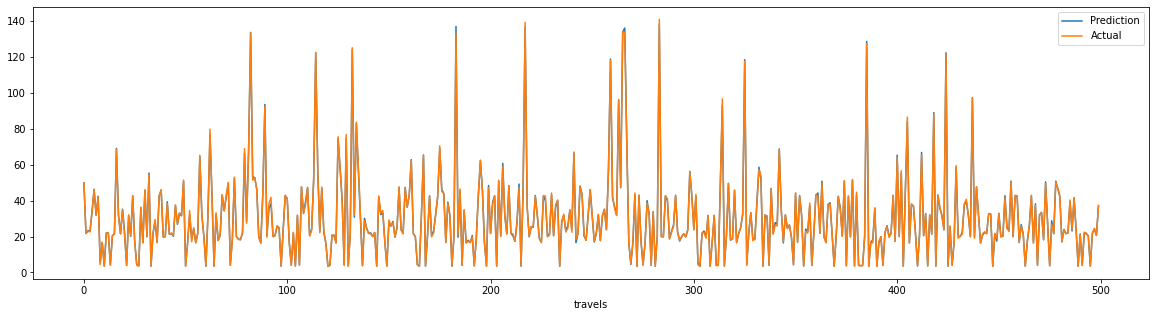

In [42]:
import matplotlib.pyplot as plt


pre_ac[0:500].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In [ ]:
# pre_ac.plot()

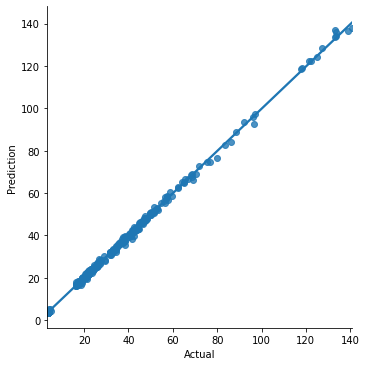

In [43]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac[0:500]);

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [47]:
mae = mean_absolute_error(test_y, prediction)
errors = abs(prediction - test_y)
mape = 100 * np.mean(np.abs(errors / test_y))
accuracy = 100 - mape
MSE = np.square(np.subtract(test_y,prediction)).mean() 
RMSE = math.sqrt(MSE)
R2 = r2_score(test_y,prediction)

In [48]:
print('Model Performance')
print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
print('RMSE: {:0.2f}.'.format(RMSE))
print('R2: {:0.2f}.'.format(R2))
print('MAPE = {:0.2f}%.'.format(mape))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
MAE: 0.4926 minutes.
RMSE: 0.80.
R2: 1.00.
MAPE = 1.98%.
Accuracy = 98.02%.


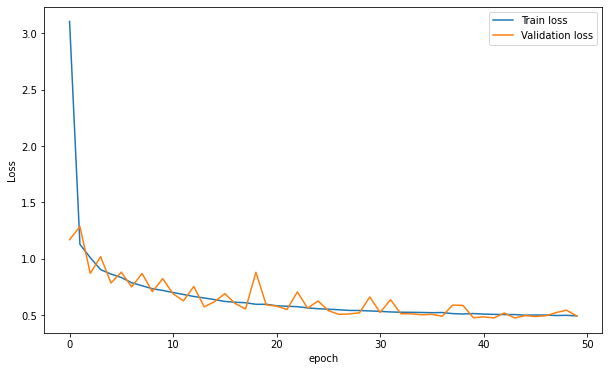

In [52]:
def plot_loss(history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss(history)

In [53]:
!pip install shap

     |████████████████████████████████| 358kB 31.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=65b61e56d716cbe9a62ba19e5c97f429ca38e99d089b292e96635adf49c7b706
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [54]:
import shap

explainer = shap.DeepExplainer(model,train_x[0:10000])
shap_values = explainer.shap_values(test_x[0:10])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


In [55]:
a = np.array([x[0] for x in shap_values[0][0]])

In [56]:
shap_value = np.array([[x[0] for x in shap_values[0][y]] for y in range(0,len(shap_values[0]))])

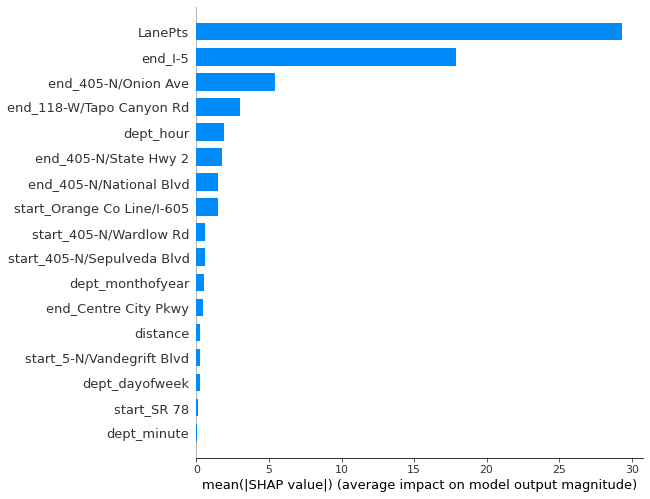

In [59]:
shap.summary_plot(shap_value, train_x, feature_names = data.columns, plot_type="bar")

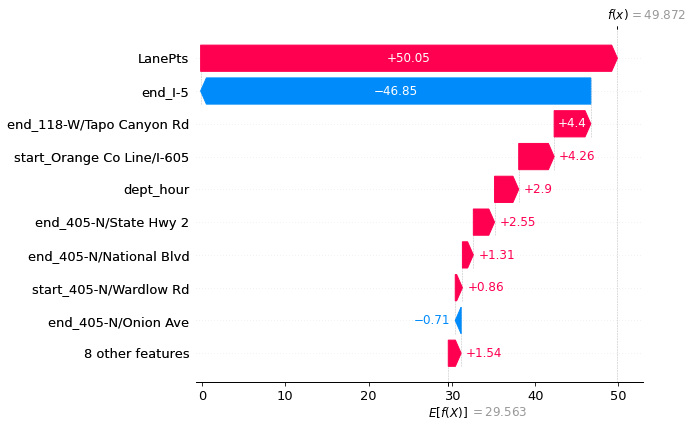

In [60]:
'''The explanation below shows features each contributing to push the model output from the base value 
(the average model output over the training dataset we passed) to the model output. Features pushing the 
prediction higher are shown in red, those pushing the prediction lower are in blue.'''
# load JS visualization code to notebook
shap.initjs()

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], a, feature_names = data.columns, show = True)

In [61]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.force_plot(explainer.expected_value, a, feature_names = data.columns, show = True)